
# Основы программирования в Python
## Cеминар 3. Дополнительный материал


## Еще немного про matplotlib

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

movies = pd.read_csv('bodycount_Directors_Genra.csv', index_col=0)
movies.head()

,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
0,24 Hour Party People,2002,7.0,R,Biography,Michael Winterbottom,117,7.3,1,0.059829
1,24 Hour Party People,2002,7.0,R,Comedy,Michael Winterbottom,117,7.3,1,0.059829
2,24 Hour Party People,2002,7.0,R,Drama,Michael Winterbottom,117,7.3,1,0.059829
3,24 Hour Party People,2002,7.0,R,Music,Michael Winterbottom,117,7.3,1,0.059829
4,28 Days Later,2002,53.0,R,Horror,Danny Boyle,113,7.6,1,0.469027


# Рейтинги: график рассеяния, подписываем фильмы

Давайте построим график рассеяния для рейтинга imbd и body count per minute. А так же подпишем значения для трех самых жестоких фильмов.

In [52]:
movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # находим три самых жестоких фильма


,Film,Year,Body_Count,MPAA_Rating,Genre,Director,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
740,Lord of the Rings: Return of the King,2003,836.0,PG-13,Action,Peter Jackson,201,8.9,1,4.159204
665,Kingdom of Heaven,2005,610.0,R,Action,Ridley Scott,144,7.1,1,4.236111
12,300,2007,600.0,R,Action,Zack Snyder,117,7.7,1,5.128205


In [53]:
bc_top = movies.drop_duplicates('Film').sort_values(by=['Body_Count'], ascending=False).head(3) # сохраним датафрейм из трех фильмов
annotations = []
for r in range(len(bc_top)): # сделаем цикл, который сложит нам в список тройки "название фильма - рейтинг - количество убийств на минуту фильма"
    annotations.append([bc_top['Film'].iloc[r], bc_top['IMDB_Rating'].iloc[r], bc_top['Body_Count_Min'].iloc[r]])
annotations

[['Lord of the Rings: Return of the King', 8.9, 4.159203980099503],
 ['Kingdom of Heaven', 7.1, 4.236111111111111],
 ['300', 7.7, 5.128205128205129]]

**Упражнение:**

Сделайте график рассеяния для рейтинга imdb по x, body count per minute для y, и body count для размера точки. Если не успеваем - посмотрите дома самостоятельно, как сделать подписи.

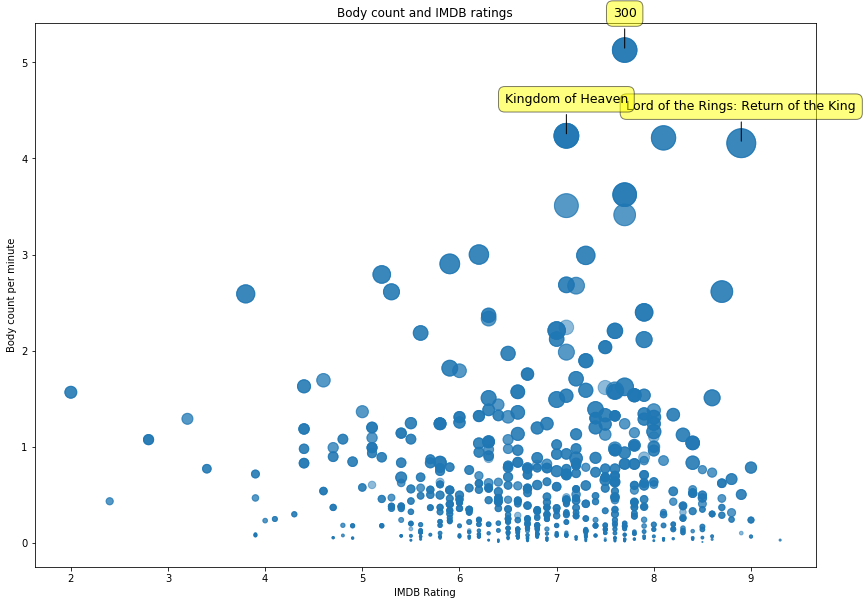

In [54]:
fig, ax = plt.subplots(figsize=(14, 10))

ax.scatter(movies['IMDB_Rating'], movies['Body_Count_Min'], s=movies['Body_Count'], alpha=.5)
ax.set_title('Body count and IMDB ratings')
ax.set_xlabel('IMDB Rating')
ax.set_ylabel('Body count per minute')

for annotation, x, y in annotations: # идем в наш список с тремя фильмами и итерируемся по нему
    plt.annotate(   # функция, которая подпишет наблюдения в нашем графики
        annotation, # обращаемся к названию фильма
        xy=(x, y),  # задаем координаты точек
        xytext=(0, 30), # задаем координаты текста (смещение на 30 единиц вверх по y)
        textcoords='offset points',
        ha='center',
        va='bottom',
        size=12.5,
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle='-'))

## Делаем совмещенные столбчатые диграммы из агрегированных данных

In [55]:
bc = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].mean(),
                        'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count'].median()})

bc_min = pd.DataFrame({'mean_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].mean(),
                           'median_value': movies.drop_duplicates('Film').groupby('Year')['Body_Count_Min'].median()})

In [56]:
# альтернативный вариант групировки
group_year = movies.groupby('Year').agg([np.mean, np.median, sum])
group_year.head()

Body_Count               Length_Minutes             IMDB_Rating         \
           mean median    sum           mean median  sum        mean median   
Year                                                                          
1949        4.0    4.0   12.0          104.0  104.0  312        8.40    8.4   
1954       56.0   50.0  280.0          138.6   93.0  693        8.08    7.6   
1957       67.0   67.0  134.0           88.0   88.0  176        8.50    8.5   
1959        7.0    7.0   28.0           79.0   79.0  316        3.90    3.9   
1960       55.0   55.0   55.0          128.0  128.0  128        7.80    7.8   

           Film_Count            Body_Count_Min                      
       sum       mean median sum           mean    median       sum  
Year                                                                 
1949  25.2          1      1   3       0.038462  0.038462  0.115385  
1954  40.4          1      1   5       0.448185  0.537634  2.240923  
1957  17.0          1      1   2       0.761364  0.761364  1.522727  
1959  15.6          1      1   4       0.088608  0.088608  0.354430  
1960   7.8          1      1   1       0.429688  0.429688  0.429688

In [57]:
bc.head()

,mean_value,median_value
Year,,
1949,4.0,4.0
1954,57.5,57.5
1957,67.0,67.0
1959,7.0,7.0
1960,55.0,55.0


In [58]:
bc_min.head()

,mean_value,median_value
Year,,
1949,0.038462,0.038462
1954,0.425822,0.425822
1957,0.761364,0.761364
1959,0.088608,0.088608
1960,0.429688,0.429688


Text(0.5,1,'Body Count by Minute')

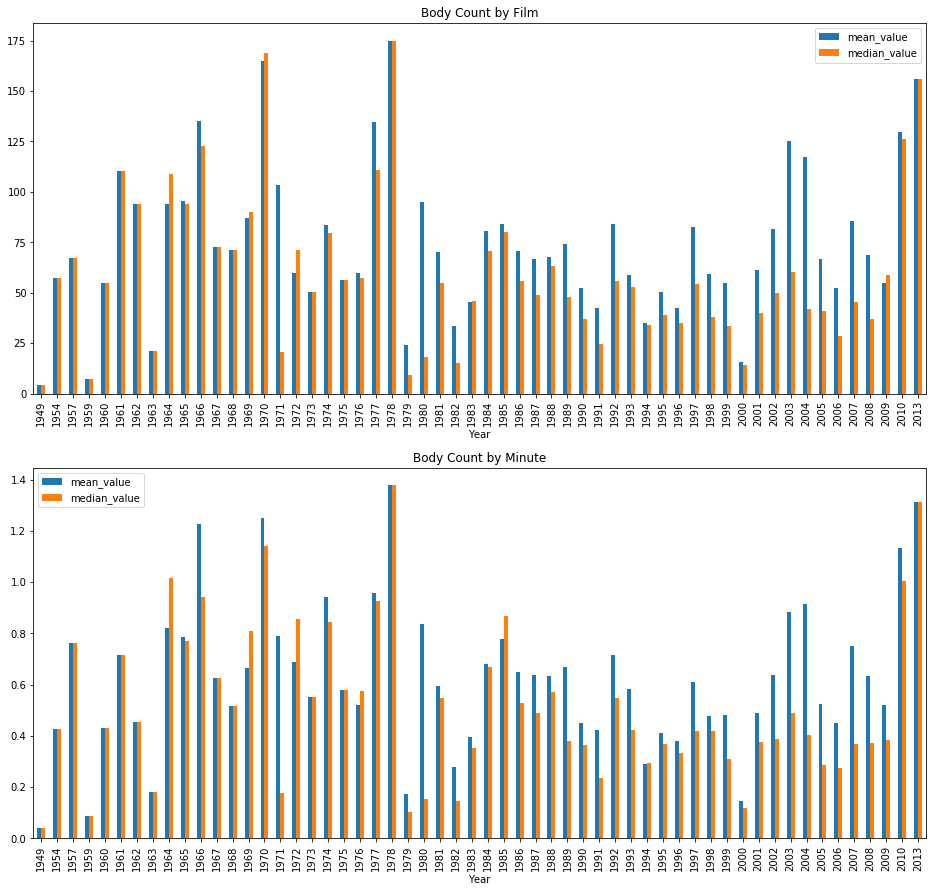

In [59]:
fig, ax = plt.subplots(2, 1, figsize=(16, 15))

bc.plot(kind='bar', ax=ax[0])
ax[0].set_title('Body Count by Film')

bc_min.plot(kind='bar', ax=ax[1])
ax[1].set_title('Body Count by Minute')
  

## Упражнение: по аналогии с фильмами найдите самых жестоких режиссеров (тут уже не выкидываем дубликаты)

In [60]:
movies_dir = movies.groupby('Director').sum().sort_values(by=['Body_Count']).tail(10)

In [61]:
movies_dir

,Year,Body_Count,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Director,,,,,,
Je-kyu Kang,6012,1770.0,420,24.3,3,12.642857
Uwe Boll,20054,1818.0,1031,28.6,10,16.766390
Steven Spielberg,45930,1824.0,3360,180.7,23,12.095150
Antoine Fuqua,30060,2015.0,1699,96.4,15,16.781665
Wolfgang Petersen,21960,2095.0,1439,75.4,11,15.862454
Zack Snyder,22071,3155.0,1358,83.2,11,27.126865
Ridley Scott,37956,3562.0,2601,143.4,19,24.768490
Edward Zwick,19997,3567.0,1411,78.5,10,24.760846
Peter Jackson,30022,4502.0,2630,123.6,15,24.186545


In [62]:
movies_dir_mean = movies_dir.groupby('Director').mean().sort_values(by=['Body_Count_Min']).tail(10)
movies_dir_mean

,Year,Body_Count,Length_Minutes,IMDB_Rating,Film_Count,Body_Count_Min
Director,,,,,,
Steven Spielberg,45930,1824.0,3360,180.7,23,12.095150
Je-kyu Kang,6012,1770.0,420,24.3,3,12.642857
Wolfgang Petersen,21960,2095.0,1439,75.4,11,15.862454
Uwe Boll,20054,1818.0,1031,28.6,10,16.766390
Antoine Fuqua,30060,2015.0,1699,96.4,15,16.781665
Peter Jackson,30022,4502.0,2630,123.6,15,24.186545
Edward Zwick,19997,3567.0,1411,78.5,10,24.760846
Ridley Scott,37956,3562.0,2601,143.4,19,24.768490
Zack Snyder,22071,3155.0,1358,83.2,11,27.126865


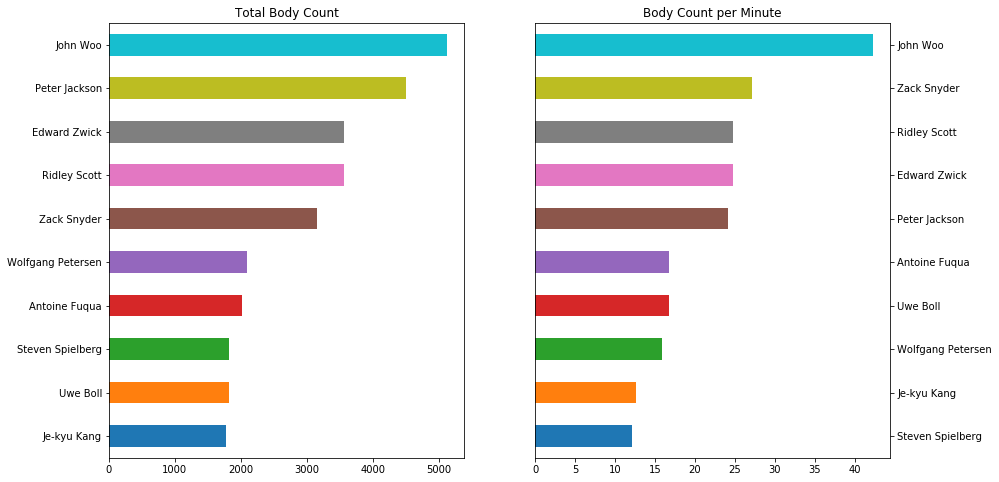

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 8))

movies_dir['Body_Count'].plot(kind='barh', ax=ax[0])
ax[0].set_title('Total Body Count')

movies_dir_mean['Body_Count_Min'].plot(kind='barh', ax=ax[1])
ax[1].set_title('Body Count per Minute')
ax[1].yaxis.set_ticks_position('right')

for i in range(2):
    ax[i].set_ylabel('', visible=False)

## Агрегация по жанрам (подсчет абсолютных значений и самые высокие средние значения)

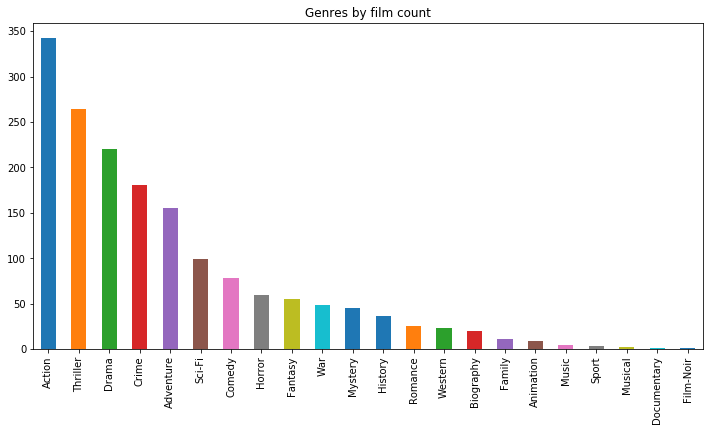

In [64]:
movies['Genre'].value_counts().plot(kind='bar', figsize=(12, 6), title='Genres by film count')


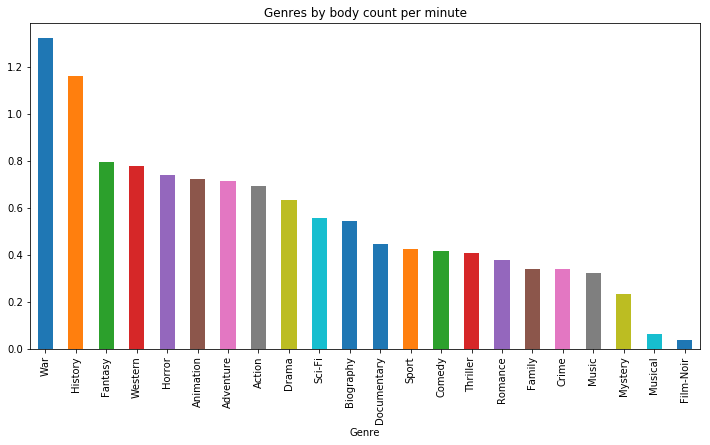

In [65]:
movies.groupby('Genre').mean().sort_values(by=['Body_Count_Min'], ascending=False)['Body_Count_Min'].plot(kind='bar', figsize=(12, 6), title='Genres by body count per minute')